In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

data = pd.read_csv('diabetes_prediction_dataset.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### График распределения данных

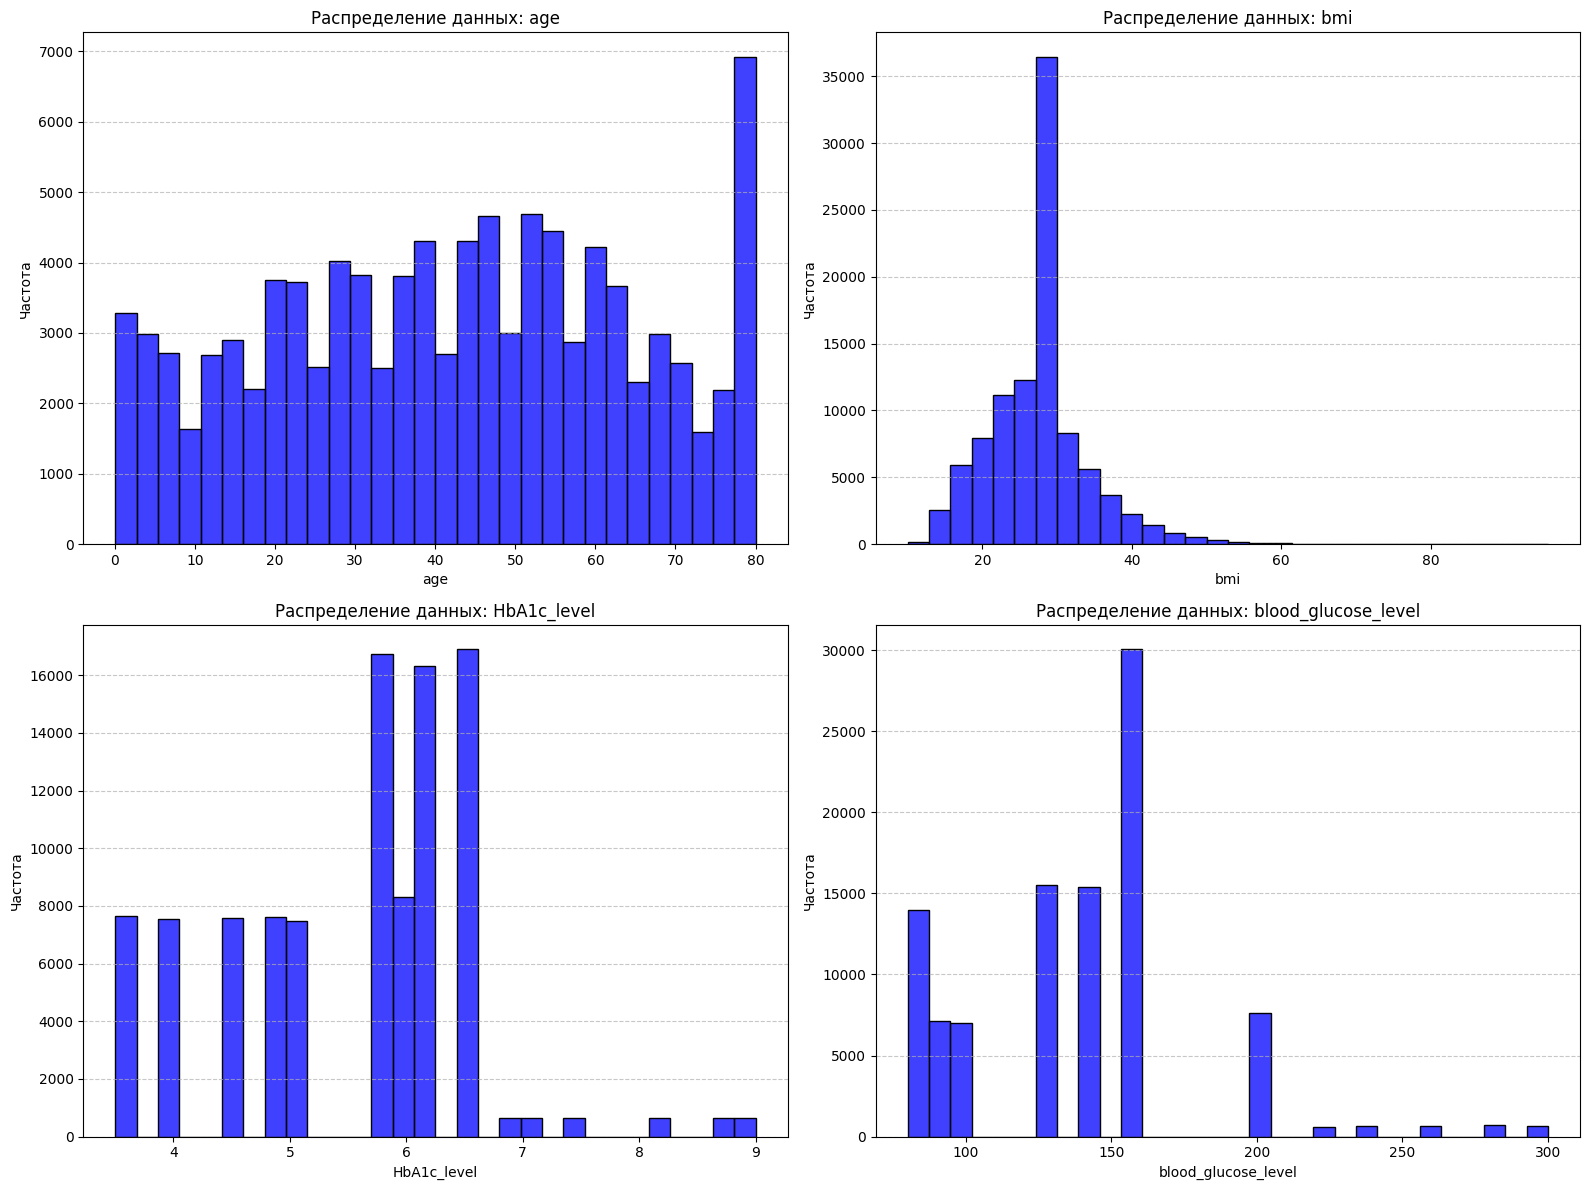

In [46]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

rows = (len(numerical_columns) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 6))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f"Распределение данных: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('graphs/distribution_graphs.png')
plt.show()

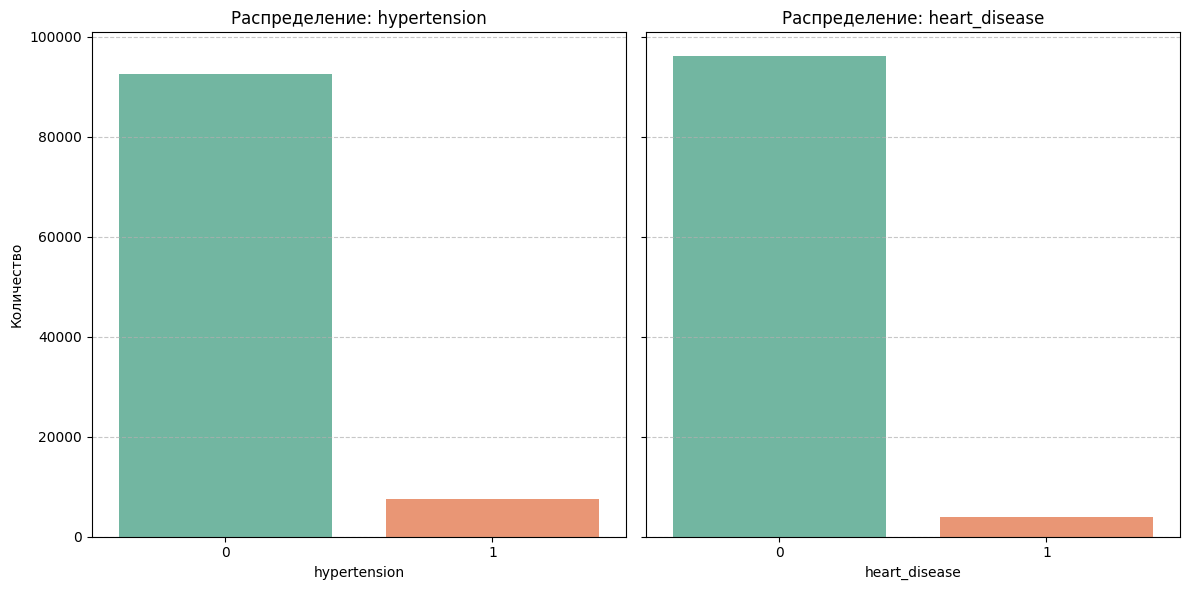

In [47]:
categorical_columns = ['hypertension', 'heart_disease']

fig, axes = plt.subplots(1, len(categorical_columns), figsize=(12, 6), sharey=True)

for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axes[i], palette="Set2", hue=col, legend=False)
    axes[i].set_title(f"Распределение: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Количество')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('graphs/categorical_distribution.png')
plt.show()

### Ящик с усами для числовых признаков
Не включены hypertension, heart_disease, diabetes - имеют значения 0 и 1

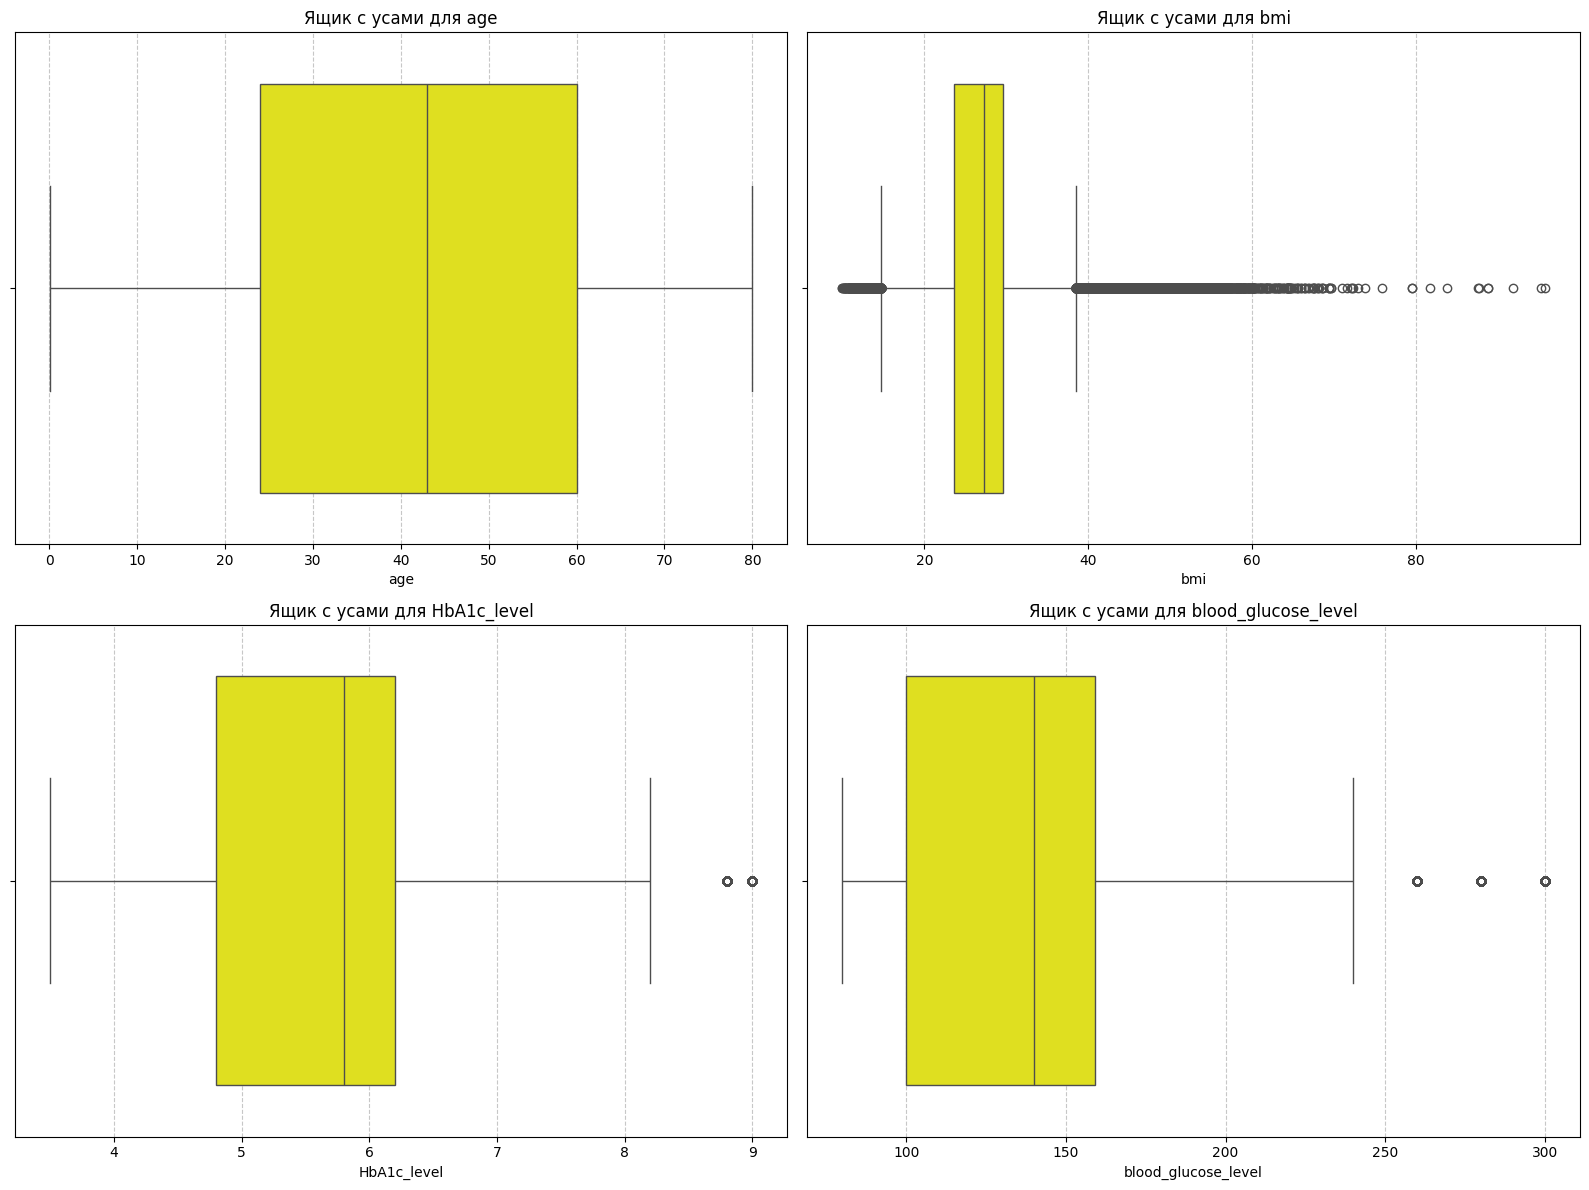

In [48]:
rows = (len(numerical_columns) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 6))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], color='yellow', ax=axes[i])
    axes[i].set_title(f"Ящик с усами для {col}")
    axes[i].set_xlabel(col)
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('graphs/boxplot.png')
plt.show()

##### Выбросы

In [49]:
outlires_info = {}

for col in numerical_columns[1:]:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_count = len(outliers)
    
    outlires_info[col] = {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers_count": outliers_count,
        "percentage": round(((outliers_count / len(data)) * 100), 3),
    }


with open('stats/outliers_data.json', 'w', encoding='utf-8') as f:
    json.dump(outlires_info, f, ensure_ascii=False, indent=4)
    

### Диаграммы количественного распеределения для тектовых признаков

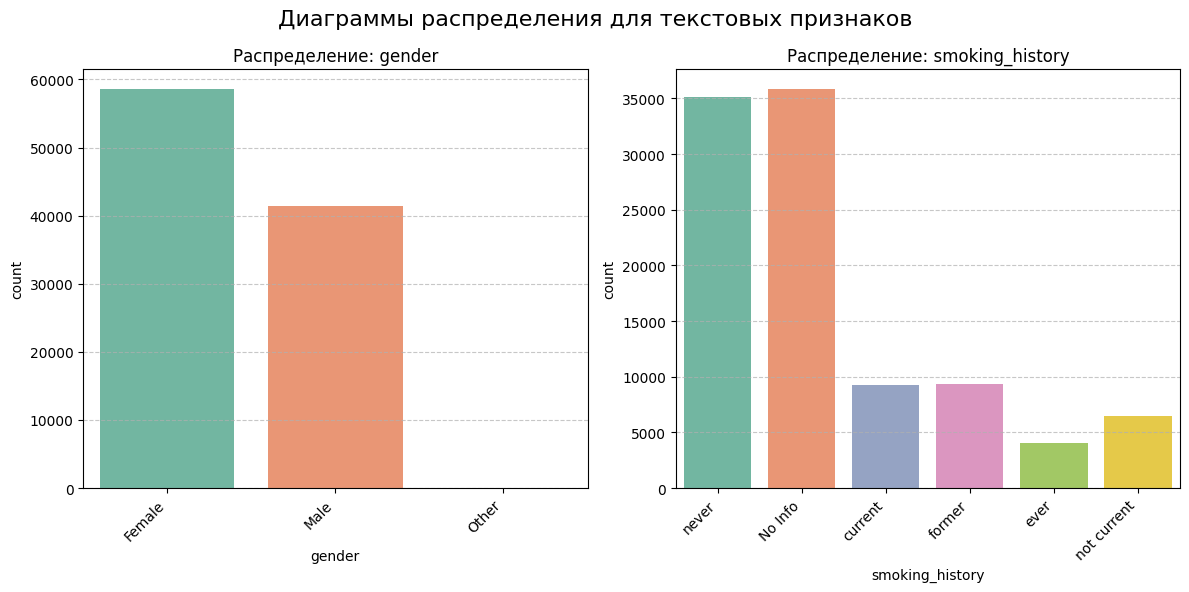

In [50]:
text_columns = ['gender', 'smoking_history']

plt.figure(figsize=(12, 6))

for i, col in enumerate(text_columns):
    plt.subplot(1, 2, i + 1)
    sns.countplot(data=data, x=col, palette="Set2", hue=col)
    plt.title(f"Распределение: {col}")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.suptitle("Диаграммы распределения для текстовых признаков", fontsize=16)
plt.tight_layout()
plt.savefig('graphs/quantitative_distribution_text.png')
plt.show()

In [51]:
imbalanced_features = {}

for col in text_columns:
    value_counts = data[col].value_counts()
    if len(value_counts) > 1:
        most_common_ratio = value_counts.iloc[0] / value_counts.sum()
        least_common_ratio = value_counts.iloc[-1] / value_counts.sum()
        if most_common_ratio > 0.9:
            imbalanced_features[col] = {
                "most_common_value": value_counts.index[0],
                "most_common_count": int(value_counts.iloc[0]),
                "ratio": round(float(most_common_ratio), 3),
            }
        elif least_common_ratio < 0.1:
            imbalanced_features[col] = {
                "least_common_value": value_counts.index[-1],
                "least_common_count": int(value_counts.iloc[-1]),
                "ratio": round(float(least_common_ratio), 3),
            }
            

with open('stats/imbalanced_features.json', 'w', encoding='utf-8') as f:
    json.dump(imbalanced_features, f, ensure_ascii=False, indent=4)

### Целевая переменная 

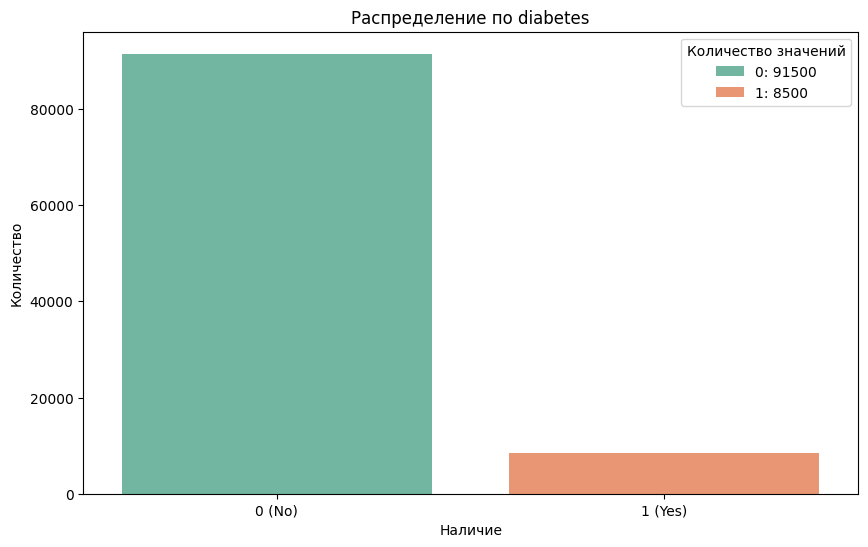

In [52]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='diabetes', palette="Set2", hue='diabetes')

counts = data['diabetes'].value_counts()
legend_labels = [f'{key}: {counts[key]}' for key in counts.index]
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, legend_labels, title='Количество значений')
plt.title("Распределение по diabetes")
plt.xlabel('Наличие')
plt.ylabel('Количество')
plt.xticks([0, 1], ['0 (No)', '1 (Yes)'])
plt.savefig('graphs/target_feature.png')
plt.show()